## Coefficient of Determination - 𝑅<sup>2</sup> & Adjusted 𝑅<sup>2</sup>

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann, lecture 362-369, __[Multiple Regression Analysis](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/learn/lecture/17550812#overview)__.)*

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
movie = pd.read_csv("../assets/data/movies_metadata.csv", low_memory= False)

In [68]:
# converting the data type in the column release_date to datetime
# then creating a datetime index with set_index
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [69]:
# sorting the datetime index from past to present
movie.sort_index(inplace = True)

In [70]:
# remove rows with NaT in the index
# otherwise the following step will cause an error
movie = movie[~movie.index.isna()]

In [71]:
# selecting the period from 2010 to 2016
# selecting independent variables:  "budget", "runtime", "vote_average", "popularity"
# vote_average is a rating between 0 and 10 on the movies database
# popularity is the number of times a movie gets searched for or has been added to the wishlist on the movies database
df = movie.loc["2010":"2016", ["title", "budget", "revenue", "runtime", "vote_average", "popularity"]].copy()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12262 entries, 2010-01-01 to 2016-12-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         12262 non-null  object 
 1   budget        12262 non-null  object 
 2   revenue       12262 non-null  float64
 3   runtime       12178 non-null  float64
 4   vote_average  12262 non-null  float64
 5   popularity    12262 non-null  object 
dtypes: float64(3), object(3)
memory usage: 670.6+ KB


In [73]:
# transforming the data type in the budget column
df.budget = pd.to_numeric(df.budget, errors = "coerce").astype(float)

In [74]:
# transforming the data type in the popularity column
df.popularity = pd.to_numeric(df.popularity, errors = "coerce")

In [75]:
# we only want movies with a revenue > 0 and a budget > 0
df = df[(df.revenue > 0) & (df.budget > 0)]

In [76]:
df.set_index("title", inplace = True) # dropping the release date and setting the title as the new index

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1569 entries, Ca$h to 20th Century Women
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        1569 non-null   float64
 1   revenue       1569 non-null   float64
 2   runtime       1569 non-null   float64
 3   vote_average  1569 non-null   float64
 4   popularity    1569 non-null   float64
dtypes: float64(5)
memory usage: 73.5+ KB


In [78]:
# converting to million us$
df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000
# df.loc[:, ["revenue"]] = df.loc[:, ["revenue"]] / 1000000

In [79]:
df.describe()

,budget,revenue,runtime,vote_average,popularity
count,1569.0000,1569.0000,1569.0000,1569.0000,1569.0000
mean,37.8906,115.6417,110.0300,6.2464,11.0693
std,50.0978,208.9668,21.7032,0.8571,18.4883
min,0.0000,0.0000,0.0000,0.0000,0.0162
25%,6.2000,5.7282,96.0000,5.7000,6.0912
50%,18.7000,35.6929,107.0000,6.3000,8.8967
75%,45.0000,122.5131,120.0000,6.8000,12.5727
max,380.0000,2068.2236,338.0000,9.0000,547.4883


In [80]:
print(df.corr()) # pairwise correlation

              budget  revenue  runtime  vote_average  popularity
budget        1.0000   0.7960   0.1931        0.0754      0.2730
revenue       0.7960   1.0000   0.1786        0.2013      0.3998
runtime       0.1931   0.1786   1.0000        0.3235      0.0401
vote_average  0.0754   0.2013   0.3235        1.0000      0.1293
popularity    0.2730   0.3998   0.0401        0.1293      1.0000


### Multiple Regression Analysis (OLS) with statsmodels

In [81]:
from statsmodels.formula.api import ols

In [82]:
df

,budget,revenue,runtime,vote_average,popularity
title,,,,,
Ca$h,7.0000,0.0465,108.0000,6.0000,9.1078
Leap Year,19.0000,29.9225,100.0000,6.5000,7.4323
Morning Glory,40.0000,58.7852,102.0000,6.1000,10.7713
Devil,10.0000,33.5832,80.0000,5.8000,7.0943
Tooth Fairy,48.0000,112.4625,101.0000,5.2000,6.7447
...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,107.0000,5.9000,0.7557
Railroad Tigers,50.0000,102.2052,124.0000,6.2000,3.7985
Dangal,10.4000,310.0000,161.0000,8.0000,8.7921


In [83]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45376 entries, 1874-12-09 to 2020-12-16
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45376 non-null  object 
 1   belongs_to_collection  4488 non-null   object 
 2   budget                 45376 non-null  object 
 3   genres                 45376 non-null  object 
 4   homepage               7766 non-null   object 
 5   id                     45376 non-null  object 
 6   imdb_id                45362 non-null  object 
 7   original_language      45365 non-null  object 
 8   original_title         45376 non-null  object 
 9   overview               44435 non-null  object 
 10  popularity             45376 non-null  object 
 11  poster_path            45037 non-null  object 
 12  production_companies   45376 non-null  object 
 13  production_countries   45376 non-null  object 
 14  revenue                45376 non-null

In [84]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~ budget + runtime + vote_average + popularity", data = df) # creating a multiple linear regression model

In [85]:
model

In [86]:
results = model.fit() # fitting the model

In [87]:
results.params # getting the regression coefficients
# we get the intercept and the slopes for the independent variables

Intercept      -202.8857
budget            3.0830
runtime          -0.1174
vote_average     30.7117
popularity        2.0592
dtype: float64

#### Visualizing and comparing the actual values for the dependent variable and the forecasted values

In [88]:
#  creating the values forecasted by the regression model with the predict method
results.predict()

array([  9.03687126,  58.87850165, 117.97799931, ...,  74.06821345,
       346.41242563,  49.2107336 ])

In [89]:
# inserting the new column predict before the index position
df.insert(loc = 2, column = "predict", value = results.predict())

In [90]:
df

,budget,revenue,predict,runtime,vote_average,popularity
title,,,,,,
Ca$h,7.0000,0.0465,9.0369,108.0000,6.0000,9.1078
Leap Year,19.0000,29.9225,58.8785,100.0000,6.5000,7.4323
Morning Glory,40.0000,58.7852,117.9780,102.0000,6.1000,10.7713
Devil,10.0000,33.5832,11.2857,80.0000,5.8000,7.0943
Tooth Fairy,48.0000,112.4625,106.8278,101.0000,5.2000,6.7447
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0000,312.2426,90.6249,107.0000,5.9000,0.7557
Railroad Tigers,50.0000,102.2052,134.9379,124.0000,6.2000,3.7985
Dangal,10.4000,310.0000,74.0682,161.0000,8.0000,8.7921


In [91]:
# distance between actual value and predicted value are the residuals
df.revenue - df.predict

title
Ca$h                                 -8.9904
Leap Year                           -28.9560
Morning Glory                       -59.1928
Devil                                22.2974
Tooth Fairy                           5.6347
                                      ...   
Resident Evil: The Final Chapter    221.6177
Railroad Tigers                     -32.7327
Dangal                              235.9318
Live by Night                      -323.7339
20th Century Women                  -43.3945
Length: 1569, dtype: float64

In [92]:
results.resid # residuals from statsmodels

title
Ca$h                                 -8.9904
Leap Year                           -28.9560
Morning Glory                       -59.1928
Devil                                22.2974
Tooth Fairy                           5.6347
                                      ...   
Resident Evil: The Final Chapter    221.6177
Railroad Tigers                     -32.7327
Dangal                              235.9318
Live by Night                      -323.7339
20th Century Women                  -43.3945
Length: 1569, dtype: float64

In [93]:
# to actually visualize actual values versus forecasted values
# first let's sort the rows by the revenue column and reset the index to a range index
# re-sortig by the revenue column from low to high
df = df.sort_values("revenue").reset_index()

In [94]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.0000,0.0000,-39.6750,114.0000,5.6000,2.2403
1,All at Once,0.7500,0.0000,-15.8879,0.0000,6.0000,0.2016
2,Duniyadari,0.3900,0.0000,-219.0310,148.0000,0.0000,0.0162
3,Raja Natwarlal,0.0000,0.0000,-48.2454,141.0000,5.5000,1.1095
4,Bodyguard,0.0001,0.0000,-53.5053,130.0000,5.2000,2.4020
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.0000,1405.4037,944.9699,141.0000,7.3000,37.3794
1565,Furious 7,190.0000,1506.2494,647.1617,137.0000,7.3000,27.2757
1566,Jurassic World,150.0000,1513.5288,512.1535,124.0000,6.5000,32.7905
1567,The Avengers,220.0000,1519.5579,870.9466,143.0000,7.4000,89.8876


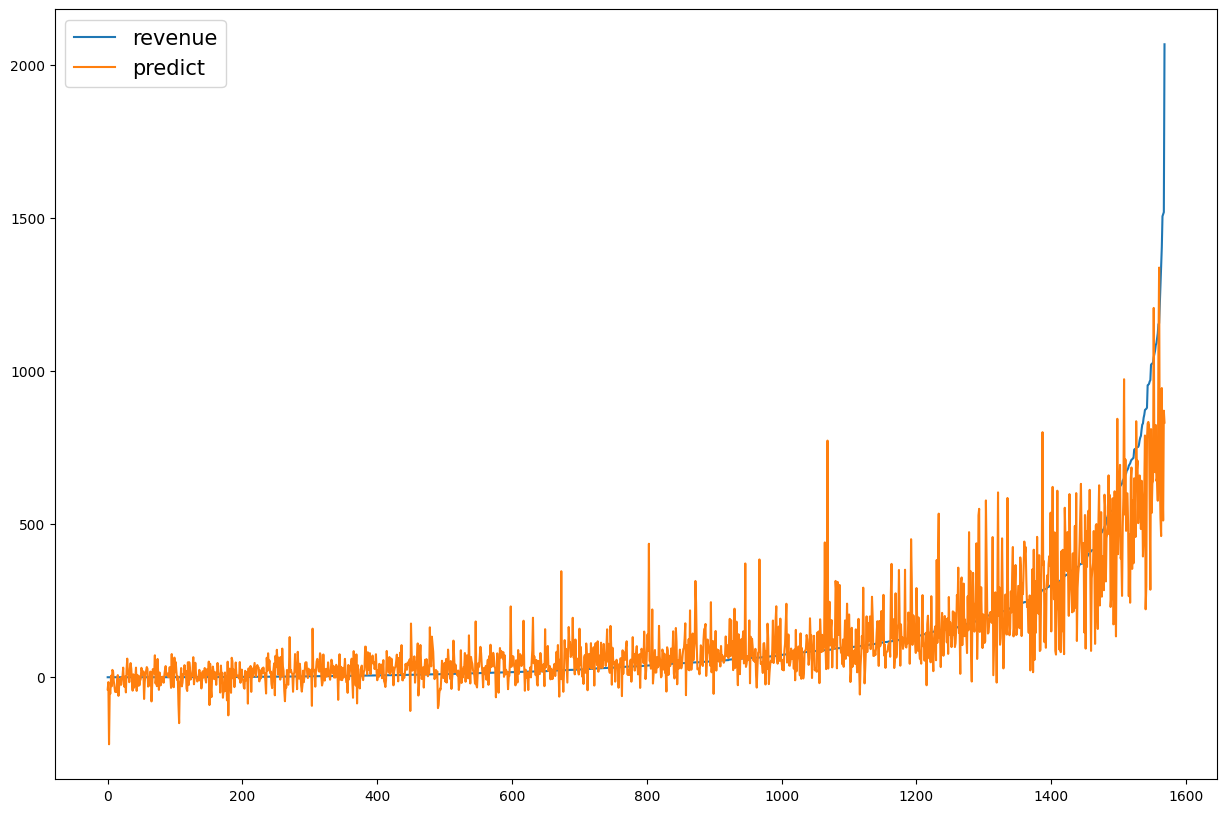

In [95]:
# creating a line plot for the revenue column and also for the predict column
df.loc[:, ["revenue", "predict"]].plot(figsize = (15, 10))
plt.legend(fontsize = 15)
plt.show()

In [96]:
results.ssr # sum of squared errors

np.float64(21611479.348156683)

In [97]:
results.mse_resid # mean squared error in square units

np.float64(13818.081424652612)

In [98]:
# as the mean squared error in square units we take the square root to get a number that we can interpret
# by taking the square root we get to 170 and million dollar.
# which is actually the mean of the average error of our regression model
# so on average the the truer revenue is plus or minus 117 million away from the predicted values.
    
results.mse_resid**0.5

np.float64(117.55033570625228)

***The mean error seems to be pretty high but to evaluate and to verify the fit of our model we need to calculate the coefficient of determination.***

In [99]:
## Coefficient of Determination - 𝑅<sup>2</sup> & Adjusted 𝑅<sup>2</sup>

#### __How well does the model fit the data & explain the dependent variable?__

𝑅<sup>2</sup> is defined as the **proportion of the variation in the dependent variable** that is collectively
explained by all of the independent variables (or the regression model).

<img src="../assets/images/r_squared_formula_2.png" width="50%" />

The problem that we have here is, that 𝑅<sup>2</sup> may not be a reliable measure of the explanatory power of the multiple regression model. The reason for this is that *𝑅<sup>2</sup> almost always increases as variables are added to the model, even if the marginal contribution of the new variables is not significant.*

The solution for this is to use the __Adjusted 𝑅<sup>2</sup>__ instead of 𝑅<sup>2</sup>. When we add new variables to the model the **Adjusted 𝑅<sup>2</sup> increases or decreases depending on the new variable's marginal contribution**.

__Therefore the Adjusted 𝑅<sup>2</sup> is always less than 𝑅<sup>2</sup>.__

<img src="../assets/images/adjusted_r_squared_formula.png" width="80%" />


In [100]:
results.rsquared

np.float64(0.6843660611789256)

In [101]:
results.rsquared_adj

np.float64(0.6835588132535521)

In our example the Adjusted 𝑅<sup>2</sup> (68.36 %) is only slightly lower than 𝑅<sup>2</sup> (68.43 %).

***We can conclude, that the four independent variables and our model as a whole explain 68.36 % of the total variation in the independent variable.***

## Regression Coefficients, Hypothesis Testing & Model Specification

Let's have a closer look at the regression coefficients the we calculated and

- perform t-tests to verify for each and every independent variable whether the variable is significant or not

- specify our model by dropping variables that are not significant, depending on the result of the t-tests

*(Not to forget that adding additional variables can change slope coefficients and also p-values of other independent variables.)*

In [102]:
pd.options.display.float_format = '{:.4f}'.format

In [103]:
df

,title,budget,revenue,predict,runtime,vote_average,popularity
0,The Letters,0.0000,0.0000,-39.6750,114.0000,5.6000,2.2403
1,All at Once,0.7500,0.0000,-15.8879,0.0000,6.0000,0.2016
2,Duniyadari,0.3900,0.0000,-219.0310,148.0000,0.0000,0.0162
3,Raja Natwarlal,0.0000,0.0000,-48.2454,141.0000,5.5000,1.1095
4,Bodyguard,0.0001,0.0000,-53.5053,130.0000,5.2000,2.4020
...,...,...,...,...,...,...,...
1564,Avengers: Age of Ultron,280.0000,1405.4037,944.9699,141.0000,7.3000,37.3794
1565,Furious 7,190.0000,1506.2494,647.1617,137.0000,7.3000,27.2757
1566,Jurassic World,150.0000,1513.5288,512.1535,124.0000,6.5000,32.7905
1567,The Avengers,220.0000,1519.5579,870.9466,143.0000,7.4000,89.8876


In [104]:
results.params # regression coefficients

Intercept      -202.8857
budget            3.0830
runtime          -0.1174
vote_average     30.7117
popularity        2.0592
dtype: float64

In [105]:
results.tvalues # t-test for the intercept and for each regression coefficient

Intercept      -8.6450
budget         49.1353
runtime        -0.7983
vote_average    8.3246
popularity     12.2409
dtype: float64

In [106]:
results.pvalues # getting the p-values

Intercept      0.0000
budget         0.0000
runtime        0.4248
vote_average   0.0000
popularity     0.0000
dtype: float64

For the intercept, the budget, the vote_average and the popularity, the p-values are close to zero.

Therefore we can reject the null-hypothesis and we can conclude that actually the variables budget, vote_average and popularity are significant.

*According to our results it is likely that runtime is not significant.*

In [107]:
print(results.summary()) # let's have a look at the summary table

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     847.8
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:56:12   Log-Likelihood:                -9703.0
No. Observations:                1569   AIC:                         1.942e+04
Df Residuals:                    1564   BIC:                         1.944e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -202.8857     23.469     -8.645   

__Having a look at the summary table for further analysis:__

- we have 1569 observations

- R-squared and Adj. R-squared are very close to each other at 0.684

- the coefficient of the Intercept is -209.6573 (significantly different from zero) with a p-value close to zero

- the partial slope coefficient for the budget variable is at 3.07 (significant bc the p-value close to zero)

__Interpretation of the partial slope coefficients:__

- If we're holding all of the other variables constant and increase the budget by 1 million UD$, then the expected revenue increases is 3.07 eight million UD$

- If we're holding all of the other variables constant and increase the vote_average by 1 (1 of what exactly?), then the expected revenue increase is 29.8 million UD$

- If we're holding all of the other variables constant and increase the popularity by 1 (1 of what exactly?), then the expected revenue increase is 2.07 million UD$

*(We conclude the increase from the coefficients.)*

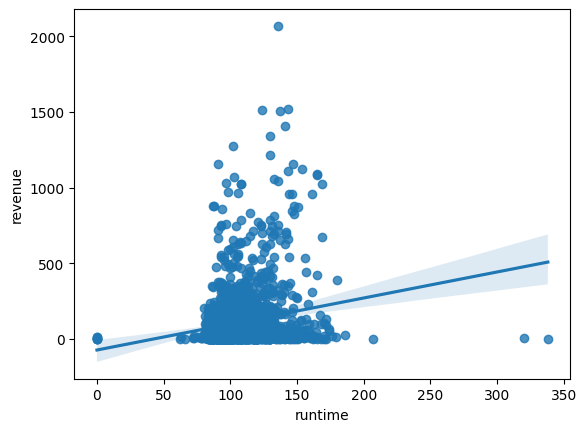

In [108]:
# runtime doesn't seem to be significant because of a relatively high p-value at 0.4
# but it seems to have a significant influence as a single variable (look at correlation above)
# can be shown with seaborn
sns.regplot(x = "runtime", y = "revenue", data = df)
plt.show()

We calculated pairwaise correlations above. We saw that the variables budget and runtime are positively correlated at 0.1931. It makes sense to assume that higher budgets lead to a longer movies.

The two independent variables are correlated and multiple regression models capture correlations between independent variables. This is the reason why the explanatory power of the runtime variable fully diminishes and the multiple regression model.

By adding the runtime variable there's no significant marginal contribution to the model. We could also say that the explanatory power for the runtime variable is already reflected in the budget variable.

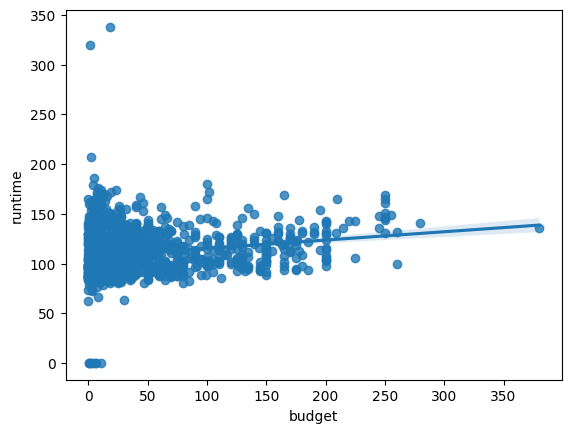

In [109]:
# visualizing that budget and runtime are positively correlated
sns.regplot(x = "budget", y = "runtime", data = df)
plt.show()

#### __Starting all over with the Regression Model__

In [110]:
model = ols("revenue ~  runtime", data = df) # ols regression model between revenue and runtime
model

In [111]:
results = model.fit()

In [112]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     51.62
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           1.04e-12
Time:                        10:56:13   Log-Likelihood:                -10582.
No. Observations:                1569   AIC:                         2.117e+04
Df Residuals:                    1567   BIC:                         2.118e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -73.5457     26.840     -2.740      0.0

***In the resulting model the runtime variable is significant (p-value close to zero) but R-squared and Adjusted R-squared are kinda low at 0.032 (~ 3 %).***

In [113]:
model = ols("revenue ~  runtime + budget", data = df)

In [114]:
results = model.fit()

In [115]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1358.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:                -9818.6
No. Observations:                1569   AIC:                         1.964e+04
Df Residuals:                    1566   BIC:                         1.966e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.7493     16.518     -2.225      0.0

***After adding budget to the model and refitting it we can see that the runtime variable gets insignificant (pretty high p-value of a 9.7 %).***

In [116]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~  budget + vote_average", data = df) # creating a multiple linear regression model

In [117]:
results = model.fit()

In [118]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1478.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:                -9775.7
No. Observations:                1569   AIC:                         1.956e+04
Df Residuals:                    1566   BIC:                         1.957e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -224.8735     22.868     -9.833   

In [119]:
# for the ols function of statsmodels we have to define a formula as this string
# first we have the revenue column where we have the dependent variable 
# we have budget as the first independent variable and then we add some more independent variables with the plus sign
# we take all the data from the dataframe df
model = ols("revenue ~  budget + vote_average + popularity", data = df) # creating a multiple linear regression model

In [120]:
results = model.fit() # fitting the model

In [121]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

***By dropping the variable runtime from our model we didn't decrease R-Squared or the adjusted R-Squared.***

***This indicates that that runtime does not improve the model and does not contribute anything to the model.***

## The F-Test in Multiple Regression

#### __As a reminder, Hypothesis Testing:__

- Test the __Intercept Coefficient__: We can test if the Intercept significantly different from 0 with a two sided t Test

- We can test for each and every __Slope Coefficient__ if the independent variables are significant (with a two sided t Test once again); we actually test if the slope coeficient is equal to zero or not

- We can also test if the __overall model__ significant (the model as a whole); we can do this by testing the set of all independent variables (this is the so called F-Test) 

#### __Multiple Regression - F-Test__

- With the F-test we can assesses how well the set of independent variables as a group, explains the dependent variable.

- What the F-test actually does is testing whether at least one of the independent variables explains the dependent variable with statistical significance.

  - we have the null hypothesis that all slope coefficients are equal to zero 
  - and we have for the alternative hypothesis that at least one slope coefficient is unequal to zero

<img src="../assets/images/f_test_formula.png" width="50%" />

- Why we need the F-test: if two or more independent variables are highly correlated, we have the problem of the so-called __Multicollinearity__. If Multicollinearity is present, then it could be the case that the model as a whole is highly significant (according to the F-test) although none of the independent variables is significant (according to the t-test)

__More about the F-test:__

- The F-test is always a one sided test

- The result of the F-test is the F-Statistic
  - We can get the F-Statistic with an analysis of variance (ANOVA)
  - Or from the statsmodels library
<br><br>
- Formula for the F-statistcs:

<img src="../assets/images/f_statistic_formula.png" width="70%" />

- The F-test also returns the p-value of the test with statsmodels

- If we compare the p-value with our level of significance, then, as a rule of thumb:
  - we should reject the 𝐻<sub>0</sub> in case the F-Statistic is high or the p-value is low (< 1%)
  - if the p-value is below 1% then we should conclude that the model as a whole explains the dependend variable with statistical significance (__Model as a whole is significant__)


### F-Test with statsmodels

In [122]:
results.fvalue # getting the f-statistic

np.float64(1130.4187152050447)

In [123]:
results.f_pvalue # getting the corresponding p-value

np.float64(0.0)

***We have a pretty high F-statistic of 1478 and a corresponding p-value that is close to zero.***

Both values are in the summary table under *F-statistic: 1478.* and *Prob (F-statistic): 0.00*.

In [124]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:56:13   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   